In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import uniform

# Question (5):

Calculate an approximative value for
$$
\mu=\int_{-2}^0 \exp \left(-(x-1)^2\right) d x
$$

(a) Reformulate the integral as an expected value related normal distribution and use that as a basis.

(b) Approximate $\mu$ by importance sampling.

(c) Approximate $\mu$ by Metropolis-Hastings algorithm.

(d) Compare your approximations (b)-(c) within each other.

## Solution

### (b) Approximation of $\mu$ by importance sampling.

In [ ]:
import numpy as np

# target function:
def p(x,location,scale):
    return norm.pdf(x,location,scale)

# proposal functions
##Cauchy
def g_cauchy(x,location,scale):
  return cauchy.pdf(x,location,scale)

##uniform
def g_uniform(x,a,b):
  return uniform.pdf(x,a,b)


def h(x):
  if x>=-2 and x<=0:
    return np.sqrt(np.pi)
  else:
    return 0



In [ ]:
#importance sampling using uniform distribution

N=10000
scale=1/np.sqrt(2)
location=1
#case1
a=0
b=2
X_uniform_1=uniform.rvs(size=N,loc=a,scale=b)
P_X=p(X_uniform_1,location,scale)
G_X=[g_uniform(x,a,b) for x in X_uniform_1]
W_uniform_1=P_X/G_X
H_X= [h(x) for x in X_uniform_1]

mean_1= sum(H_X*W_uniform_1)/sum(W_uniform_1)
mean_1

#case2
a=-2
b=6
X_uniform_2=uniform.rvs(size=N,loc=a,scale=b)
P_X=p(X_uniform_2,location,scale)
G_X=[g_uniform(x,a,b) for x in X_uniform_2]
W_uniform_2=P_X/G_X
H_X= [h(x) for x in X_uniform_2]

mean_2= sum(H_X*W_uniform_2)/sum(W_uniform_2)
mean_2
#case3
a=-4
b=10
X_uniform_3=uniform.rvs(size=N,loc=a,scale=b)
P_X=p(X_uniform_3,location,scale)
G_X=[g_uniform(x,a,b) for x in X_uniform_3]
W_uniform_3=P_X/G_X
H_X= [h(x) for x in X_uniform_3]

mean_3= sum(H_X*W_uniform_3)/sum(W_uniform_3)
mean_1,mean_2,mean_3 #0.0, 0.13938695262975492, 0.1485912026336771

(0.0, 0.13938695262975492, 0.1485912026336771)

(0.0, 0.65)

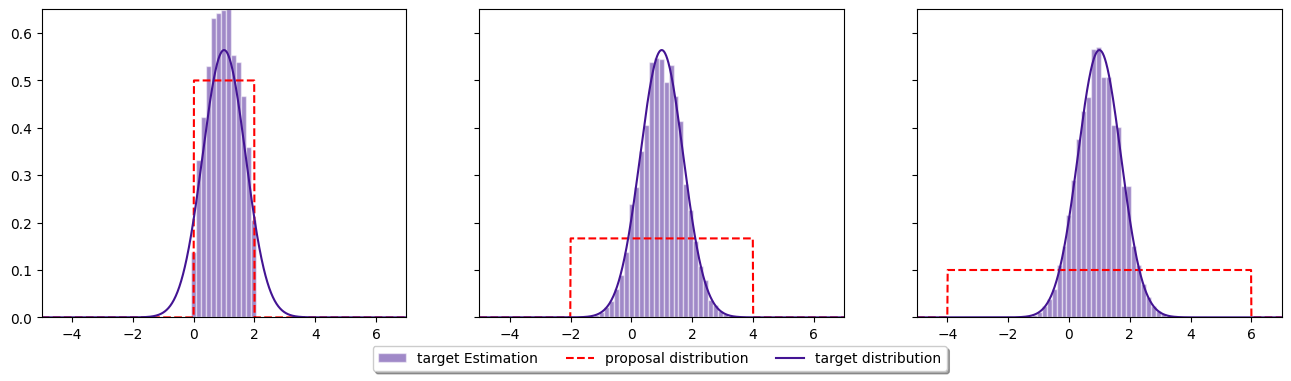

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharey=True, figsize=(16, 4))


wv = np. linspace (-5,7 ,1000)
ax1.hist(X_uniform_1,weights=W_uniform_1,bins=np.linspace (-4,4 ,50) , alpha=0.5, color='#431492',label='Estimated target',density=True,edgecolor = "white")
ax1.plot(wv ,g_uniform(wv,0,2),label='proposal distribution',linestyle='dashed',color='red')
ax1.plot(wv ,p(wv,location,scale),label='target distribution',color='#431493')
ax1.set_xlim(-5,7)


ax2.hist(X_uniform_2,weights=W_uniform_2,bins=np.linspace (-4,4 ,50) , alpha=0.5, color='#431492',label='target Estimation',density=True,edgecolor = "white")
ax2.plot(wv ,g_uniform(wv,-2,6),label='proposal distribution',linestyle='dashed',color='red')
ax2.plot(wv ,p(wv,location,scale),label='target distribution',color='#431493')
ax2.legend(ncol=3,loc='upper right',bbox_to_anchor=(1.3, -.07),
          fancybox=True, shadow=True)
ax2.set_xlim(-5,7)


ax3.hist(X_uniform_3,weights=W_uniform_3,bins=np.linspace (-4,4 ,50) , alpha=0.5, color='#431492',label='Estimation',density=True,edgecolor = "white")
ax3.plot(wv ,g_uniform(wv,-4,10),label='proposal ',linestyle='dashed',color='red')
ax3.plot(wv ,p(wv,location,scale),label='target ',color='#431492')

ax3.set_xlim(-5,7)
ax3.set_ylim(0,.65)



### (c) Approximation of $\mu$ by Metropolis-Hastings algorithm.

In [ ]:
#  Metropolis-Hastings
def p(x,location,scale):
    return norm.pdf(x,location,scale)

def g(x):
  return


def h(x):
  if x>=-2 and x<=0:
    return np.sqrt(np.pi)
  else:
    return 0

scale= 1/np.sqrt(2)

N = 10000

X= np.empty(N)
X[0] = 0

#normal
for n in range(1,N):
  Y=norm.rvs(X[n-1],scale,1)

  R= min(1,(p(Y,1,scale)*p(Y,X[n-1],scale))/(p(X[n-1],1,scale)*p(X[n-1],Y,scale)) )
  if uniform.rvs(0,1,1)<= R:
    X[n]=Y
  else:
    X[n]=X[n-1]


In [ ]:
h_X=[h(x) for x in X]
mean=sum(h_X)/len(X)
mean

0.13966936345135603

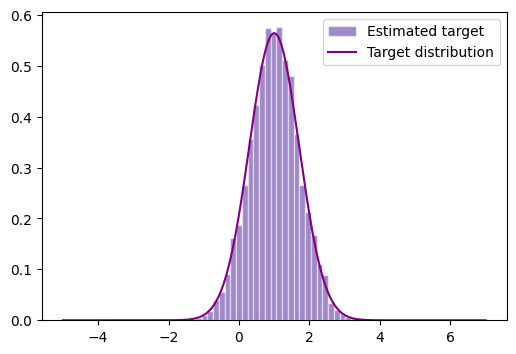

In [ ]:
plt.figure(figsize=(6,4))
wv = np.linspace ( -5,7 ,1000)

plt.hist(X, bins=np.linspace ( -4,4,50),alpha=0.5, color='#431492',label='Estimated target',density=True,edgecolor = "white")
plt.plot(wv ,p(wv,1,scale),label='Target distribution',color='purple')
plt.legend(loc='upper right')

### Comparison between the approximations in (b) and (c).

Text(0.5, 1.0, 'Metropolis-Hastings')

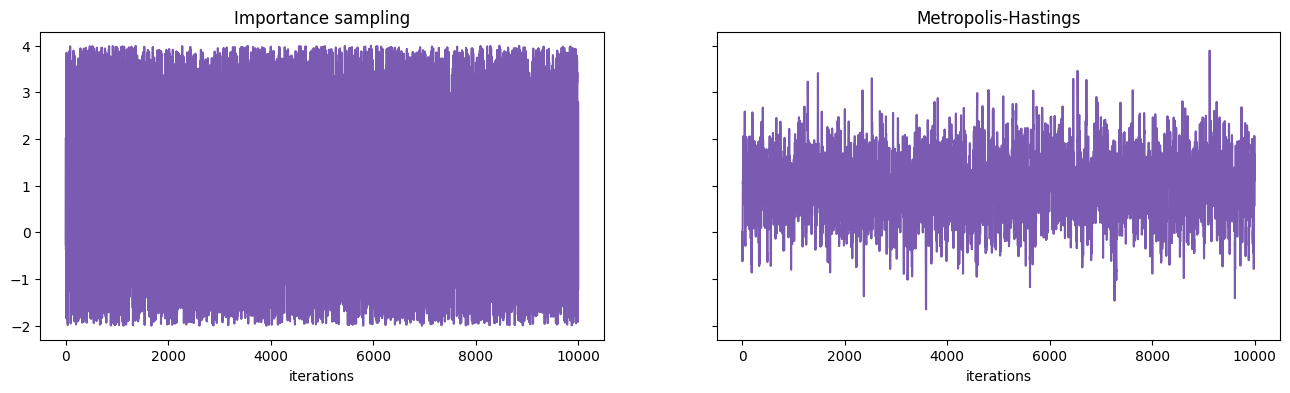

In [ ]:
# Generated samples comparison.
fig, (ax1,ax2) = plt.subplots(1, 2,sharey=True,figsize=(16, 4))

ax1.plot([x for x in range(N)],X_uniform_2,color='#431492',alpha=0.7)
ax1.set_xlabel('iterations')
ax1.set_title('Importance sampling')

ax2.plot([x for x in range(N)],X,color='#431492',alpha=0.7)
ax2.set_xlabel('iterations')
ax2.set_title('Metropolis-Hastings')


In [ ]:
# sampling distribution comparison
import random
import numpy
from matplotlib import pyplot

N1=1000
N=10000
scale= 1/np.sqrt(2)
h_IS=np.zeros(N1)
h_MH=np.zeros(N1)


def p(x,location,scale):
    return norm.pdf(x,location,scale)

def h(x):
  if x>=-2 and x<=0:
    return np.sqrt(np.pi)
  else:
    return 0



def g_uniform(x,a,b):
  return uniform.pdf(x,a,b)


for i in range(N1):
  X= np.empty(N)
  X[0] = 0
  for n in range(1,N):
    Y=norm.rvs(X[n-1],scale,1)
    R= min(1,(p(Y,1,scale)*p(Y,X[n-1],scale))/(p(X[n-1],1,scale)*p(X[n-1],Y,scale)) )
    if uniform.rvs(0,1,1)<= R:
      X[n]=Y
    else:
      X[n]=X[n-1]
  h_X=[h(x) for x in X]
  mean=sum(h_X)/len(X)
  h_MH[i]= mean

  a=-2
  b=6
  location=1
  scale=1/np.sqrt(2)
  X_uniform_2=uniform.rvs(size=N,loc=a,scale=b)
  P_X=p(X_uniform_2,location,scale)
  G_X=[g_uniform(x,a,b) for x in X_uniform_2]
  W_uniform_2=P_X/G_X
  H_X= [h(x) for x in X_uniform_2]

  mean_2= sum(H_X*W_uniform_2)/sum(W_uniform_2)
  h_IS[i]= mean_2


In [ ]:
np.mean(h_IS),np.mean(h_MH),np.std(h_IS),np.std(h_MH)

(0.13934666314207975,
 0.13975178255542312,
 0.0042626126377646595,
 0.011182252156297983)

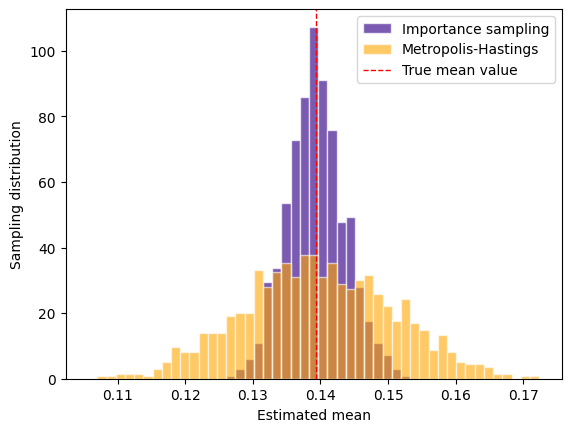

In [ ]:
# histogram compare between the MC and MCAV
max_std=.1/3

bins = numpy.linspace( 0.139-max_std,0.139+max_std, 50)

plt.hist(h_IS, bins=bins, alpha=0.7, label='Importance sampling',density=True, color='#431492',edgecolor = "white")
plt.hist(h_MH, bins=bins, alpha=0.6, label='Metropolis-Hastings',density=True, color='orange',edgecolor = "white")
plt.axvline(.139383215447, color='Red', linestyle='dashed', linewidth=1, label='True mean value')
plt.xlabel('Estimated mean')
plt.ylabel('Sampling distribution')

plt.legend(loc='upper right')
plt.show()